In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sc

### Barplot

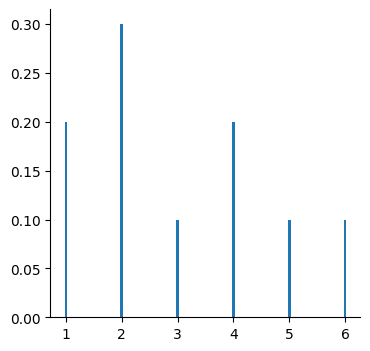

In [2]:
fig, ax = plt.subplots(figsize=(4,4))
u = [1,2,3,4,5,6]
v = [0.2,0.3,0.1,0.2,0.1,0.1]
ax.bar(u, v,width=0.05)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
fig.savefig("pmf.png")

### CDF (discrete)

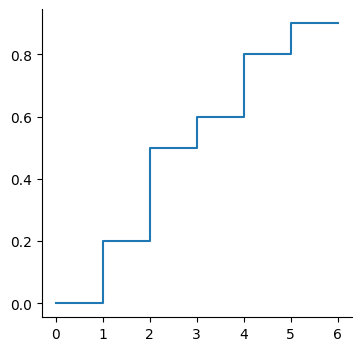

In [3]:
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(np.sort(np.hstack((0,u,u)))[:-1], np.sort(np.hstack((0,0,np.cumsum(v),np.cumsum(v))))[:-2])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
fig.savefig("discretecdf.png")

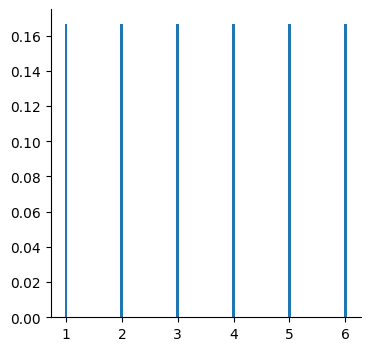

In [4]:
fig, ax = plt.subplots(figsize=(4,4))
u = [1,2,3,4,5,6]
v = [1./6. for i in range(6)]
ax.bar(u, v,width=0.05)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
fig.savefig("uniformdiscretpmf.png")

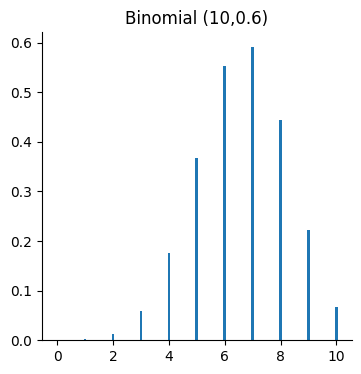

In [5]:
from math import comb
fig, ax = plt.subplots(figsize=(4,4))
n=10
p=0.6

u = np.arange(n+1)
Cnp = np.array([comb(n+1,i) for i in range(n+1)])

v = Cnp*p**u*(1-p)**(n-u)

ax.bar(u, v,width=0.09)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.set_title("Binomial (10,0.6)")
fig.savefig("binomialpmf.png")

### Density and proba

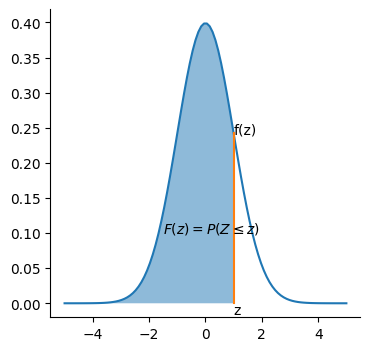

In [6]:
fig, ax = plt.subplots(figsize=(4,4))

v=np.linspace(-5,5,100)
lim = 1
w=np.linspace(-5,lim,100)

plt.plot(v,sc.norm.pdf(v))
plt.fill_between(w,sc.norm.pdf(w),alpha=0.5)
plt.text(-1.5,0.1,r'$F(z)=P(Z\leq z)$')
plt.text(lim,-0.015,"z")
plt.text(lim,sc.norm.pdf(lim),"f(z)")
plt.plot([lim,lim],[0,sc.norm.pdf(lim)])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("density.png")

### Density infinitesimal

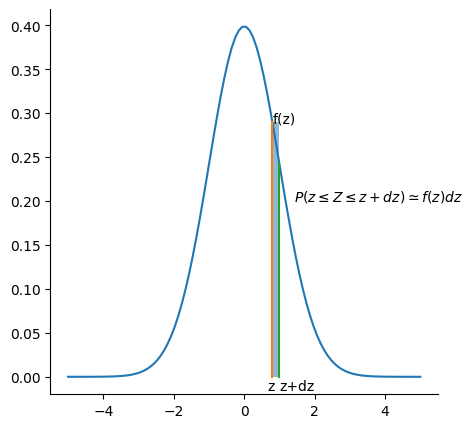

In [7]:
fig, ax = plt.subplots(figsize=(5,5))

v=np.linspace(-5,5,100)
limmin=0.8
limmax=1
w=np.linspace(limmin,limmax,100)

plt.plot(v,sc.norm.pdf(v))
plt.fill_between(w,sc.norm.pdf(limmin),0,alpha=0.5)
plt.text(1.4,0.2,r'$P(z \leq Z\leq z+dz)\simeq f(z)dz$')
plt.text(limmin-0.15,-0.015,"z")
plt.text(limmax,-0.015,"z+dz")
plt.text(limmin,sc.norm.pdf(limmin),"f(z)")
plt.plot([limmin,limmin],[0,sc.norm.pdf(limmin)])
plt.plot([limmax,limmax],[0,sc.norm.pdf(limmax)])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("density.png")

In [8]:
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
cc=colors[0]

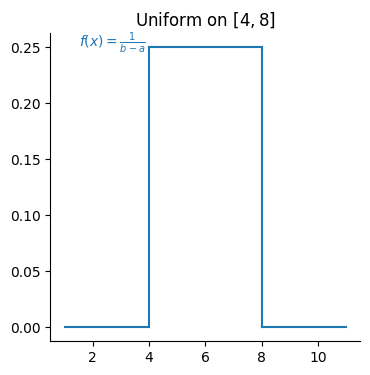

In [9]:
a=4
b=8

fig, ax = plt.subplots(figsize=(4,4))

plt.plot([a-3,a],[0,0],c=cc)
plt.plot([b,b+3],[0,0],c=cc)
plt.plot([a,a],[0,1/(b-a)],c=cc)
plt.plot([b,b],[0,1/(b-a)],c=cc)
plt.plot([a,b],[1/(b-a),1/(b-a)],c=cc)
plt.title(r'Uniform on $[4,8]$')
plt.text(1.5,0.25,r'$f(x)=\frac{1}{b-a}$',c=cc)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("uniformpdf.png")

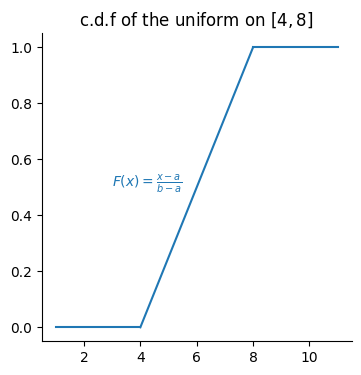

In [10]:
fig, ax = plt.subplots(figsize=(4,4))

plt.plot([a-3,a],[0,0],c=cc)
plt.plot([b,b+3],[1,1],c=cc)
plt.plot([a,b],[0,1],c=cc)
plt.title(r'c.d.f of the uniform on $[4,8]$')
plt.text(3,0.5,r'$F(x)=\frac{x-a}{b-a}$',c=cc)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("uniformcdf.png")

### CDF continuous

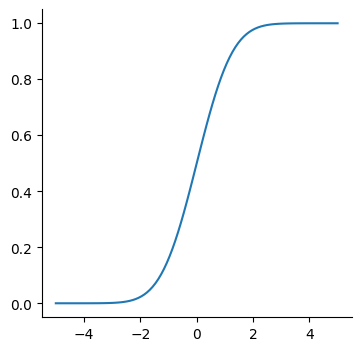

In [11]:
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(v,sc.norm.cdf(v))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.savefig("cdf.png")

### Law of large numbers 

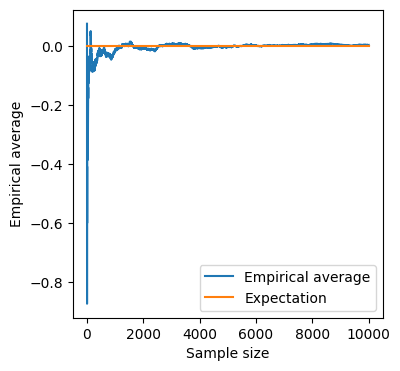

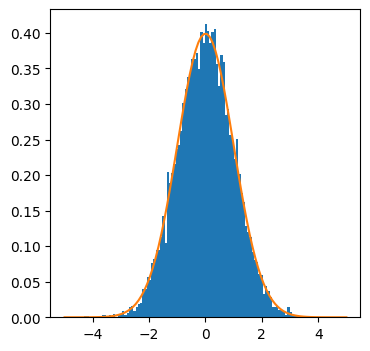

In [12]:
fig, ax = plt.subplots(figsize=(4,4))

np.random.seed(1345)
n=10000
x = np.random.normal(size=n)

plt.plot(np.arange(1,n+1),np.cumsum(x)/np.arange(1,n+1),label = "Empirical average")
plt.plot([1,n+1],[0,0],label = "Expectation")
plt.xlabel("Sample size")
plt.ylabel("Empirical average")
plt.legend()
plt.savefig("lln.png")
plt.show()

fig, ax = plt.subplots(figsize=(4,4))

a=plt.hist(x,density=True,bins=100)
v=np.linspace(-5,5,100)
plt.plot(v,sc.norm.pdf(v))
plt.savefig("llnhisto.png")

### Scatter plot and Histo 2D

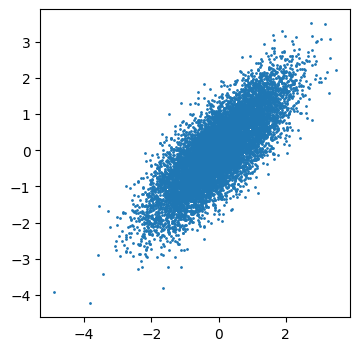

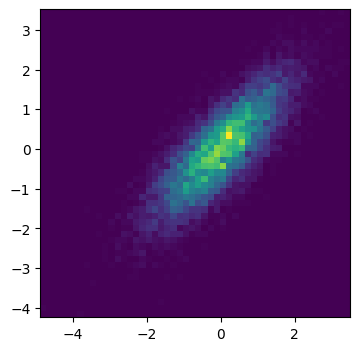

In [13]:
n=10000
rho=0.8
np.random.seed(2354920)
fig,ax = plt.subplots(figsize=(4,4))
u = np.random.normal(size=n)
v=np.random.normal(size=n)
w=rho * u+ np.sqrt(1-rho**2)*v
plt.scatter(u,w,s=1)

plt.savefig("scattergauss.png")
fig,ax = plt.subplots(figsize=(4,4))

a=plt.hist2d(u,w,bins=50)
plt.savefig("hist2dgauss.png")

### Bivariate density

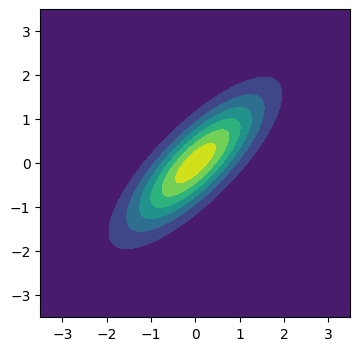

In [14]:
um=-3.5
uM=3.5
wm=-3.5
wM=3.5

x, y = np.mgrid[um:uM:.01, wm:wM:.01]
pos = np.dstack((x, y))
rv = sc.multivariate_normal([0., 0.], [[1.0, rho], [rho , 1]])
fig2 = plt.figure(figsize=(4,4))
ax2 = fig2.add_subplot(111)
ax2.contourf(x, y, rv.pdf(pos))
plt.savefig("densitygauss.png")

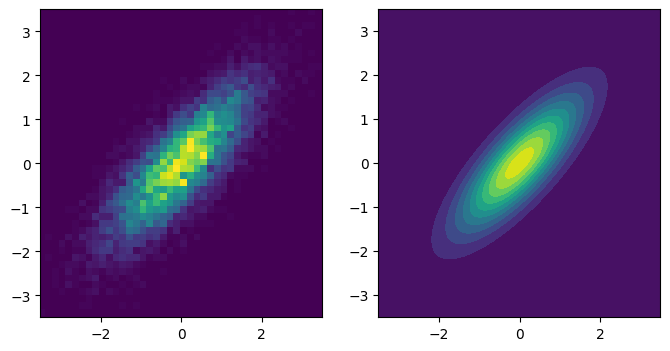

In [15]:
x, y = np.mgrid[um:uM:.01, wm:wM:.01]
pos = np.dstack((x, y))
rv = sc.multivariate_normal([0., 0.], [[1.0, rho], [rho , 1]])
fig2 = plt.figure(figsize=(8,4))
ax2 = fig2.add_subplot(122)
ax2.contourf(x, y, rv.pdf(pos),vmin=0,vmax=0.28,levels=10)
ax2 = fig2.add_subplot(121)
ax2.hist2d(u,w,bins=50,density=True,vmin=0,vmax=0.28)
plt.xlim([um,uM])
plt.ylim([um,uM])

plt.savefig("density2dhisto.png")



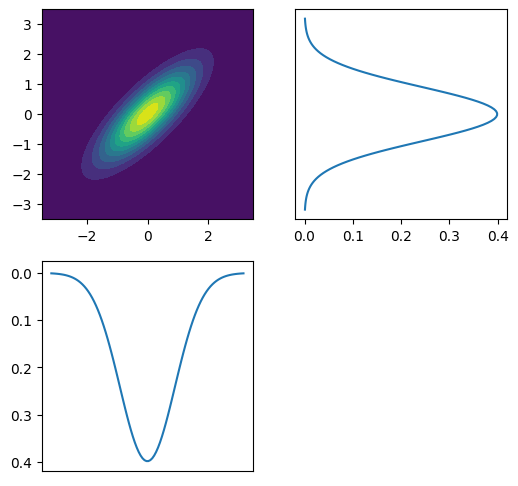

In [18]:

vu=np.linspace(um,uM,100)
vw=np.linspace(wm,wM,100)

def f(v):
    return 1./np.sqrt(2*np.pi) * np.exp(-v**2/2)
x, y = np.mgrid[um:uM:.01, wm:wM:.01]
pos = np.dstack((x, y))
rv = sc.multivariate_normal([0., 0.], [[1.0, rho], [rho , 1]])
fig2 = plt.figure(figsize=(6,6))
ax2 = fig2.add_subplot(221)
ax2.contourf(x, y, rv.pdf(pos),vmin=0,vmax=0.28,levels=10)

ax2 = fig2.add_subplot(222)
ax2.plot(f(vw),vw)
ax2.set_yticks([])
ax2 = fig2.add_subplot(223)
ax2.plot(vu,f(vu))
ax2.set_ylim(0.42, -0.025) 
ax2.set_xticks([])
plt.savefig("marginal.png")


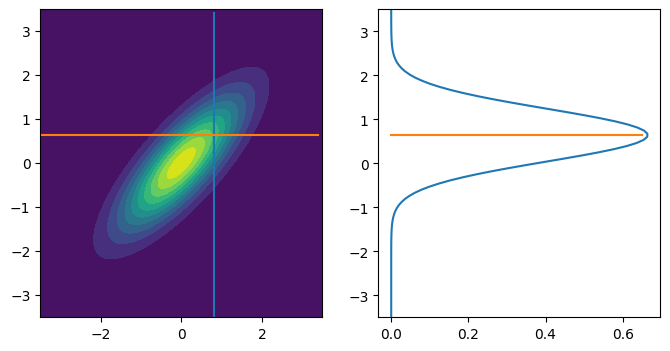

In [20]:
def f(v,x,rho):
    return 1./np.sqrt((1-rho**2)*2*np.pi) * np.exp(-(v-rho*x)**2/(2*(1-rho**2)))

x0 = 0.8

x, y = np.mgrid[um:uM:.01, wm:wM:.01]
pos = np.dstack((x, y))
rv = sc.multivariate_normal([0., 0.], [[1.0, rho], [rho, 1]])

fig2 = plt.figure(figsize=(8,4))
ax2 = fig2.add_subplot(121)
ax2.contourf(x, y, rv.pdf(pos),vmin=0,vmax=0.28,levels=10)

ax2.plot([x0,x0],[wm,wM-0.1])
ax2.plot([um,uM-0.1],[x0*rho,x0*rho])

ax2 = fig2.add_subplot(122)
ax2.plot(f(vw,x0,rho),vw)
ax2.plot([0,0.65],[x0*rho,x0*rho])
plt.ylim([wm,wM])
#ax2.set_yticks([])

plt.savefig("conditional.png")
